# South Korea COVID19 Analysis

## Preliminary Wrangling

> The dataset is available on kaggle: [Source](https://www.kaggle.com/kimjihoo/coronavirusdataset)
> The dataset contains four main data segments:
- **Case data**:
    - Case: information about COVID19 infenction cases
- **Patient data**:
    - PatientInfo: Epidemiological data of COVID19 
    - PatientRoute: Route data of COVID19 
- **Time series data**:
    - Time: Time series data of COVID19 status
    - TimeAge: Time series data of COVID19 status in terms of the age
    - TimeGender: Time series data of COVID19 status in terms of the gender
    - TimeProvince: Time serie data of COVID19 status in terms of the province
- **Additional data**:
    - Region: Location and statistical data of the regions in South Korea
    - Weather: Weather data
    - SearchTrend: Trend data of the keywords searched in NAVER - one of the largest portals in South Korea
    - SeoulFloating: Floating population in Seoul
    - Policy: Data of the government policy for COVID19
    

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas


%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [36]:
case_df = pd.read_csv('Data/Case.csv')
patientinfo_df = pd.read_csv('Data/PatientInfo.csv')
patientroute_df = pd.read_csv('Data/PatientRoute.csv')
time_df = pd.read_csv('Data/time.csv')
timeage_df = pd.read_csv('Data/TimeAge.csv')
timegender_df = pd.read_csv('Data/TimeGender.csv')
timeprovince_df = pd.read_csv('Data/TimeProvince.csv')
region_df = pd.read_csv('Data/Region.csv')
weather_df = pd.read_csv('Data/Weather.csv')
searchtrend_df = pd.read_csv('Data/SearchTrend.csv')
policy_df = pd.read_csv('Data/Policy.csv')
names = ['case', 'patientinfo', 'patientroute', 'time', 'timeage', 'timegender','timeprovince',
        'region', 'weather', 'searchtrend', 'policy']
dataframes = [case_df, patientinfo_df, patientroute_df, time_df, timeage_df, timegender_df, timeprovince_df,
      region_df, weather_df, searchtrend_df, policy_df]
data = dict(zip(names, dataframes))

In [20]:
print(case_df.shape[0])
case_df.head(1)

128


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,133.0,37.538621,126.992652


In [21]:
print(patientinfo_df.shape[0])
patientinfo_df.head(1)

4004


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released


In [22]:
print(patientroute_df.shape[0])
patientroute_df.head(1)

8092


,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632


In [32]:
policy_df

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN
5,6,Korea,Immigration,Special Immigration Procedure,from Hong Kong,2020-02-12,NaN
6,7,Korea,Immigration,Special Immigration Procedure,from Macau,2020-02-12,NaN
7,8,Korea,Immigration,Special Immigration Procedure,from Japan,2020-03-09,NaN
8,9,Korea,Immigration,Special Immigration Procedure,from Italy,2020-03-12,NaN
9,10,Korea,Immigration,Special Immigration Procedure,from Iran,2020-03-12,NaN


In [47]:
for key,val in data.items():
    print(key +":")
    print(data[key].isnull().sum())
    print("duplicates:",data[key].duplicated().sum())
    print(data[key].dtypes)
    print("---")

case:
case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         3
latitude          0
longitude         0
dtype: int64
duplicates: 0
case_id             int64
province           object
city               object
group                bool
infection_case     object
confirmed         float64
latitude           object
longitude          object
dtype: object
---
patientinfo:
patient_id               0
global_num            1198
sex                    330
birth_year             737
age                    479
country                  0
province                 0
city                    78
disease               3986
infection_case         793
infection_order       3973
infected_by           3105
contact_number        3324
symptom_onset_date    3469
confirmed_date           3
released_date         2496
deceased_date         3939
state                    0
dtype: int64
duplicates: 0
patient_id              int64
global_num            flo

# Cleanup:

In [407]:
patientinfo_df[patientinfo_df['confirmed_date'].isna()]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
3588,6011000051,NaN,female,1980,40s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaT,NaN,NaN,isolated
3589,6011000052,NaN,female,2011,0s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,NaN,NaT,NaN,NaN,isolated
3590,6011000053,NaN,female,2001,10s,Korea,Gyeongsangbuk-do,Andong-si,NaN,etc,NaN,NaN,NaN,2020-04-15,NaT,NaN,NaN,released


In [411]:
patientinfo_df.drop(patientinfo_df[patientinfo_df['confirmed_date'].isna()].index, axis=0, inplace=True)

### What is the structure of your dataset?

> <img src="Data/DatasetStructure.png">

### What is/are the main feature(s) of interest in your dataset?

> Infected patient's main features and geodata and weather's impact on the infection spread. The dataset also provides search data what might help to understand people's reactions and feelings.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Latitude and longitude will allow maps visualizations, weather file will deliver enough information to compare changes in weather with number of new patients. SearchTrend data allows more insight on people's moods. PatientInfo and PatientRoute datasets help distinguish the common people characteristics.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [192]:
base_color = sb.color_palette()[0]

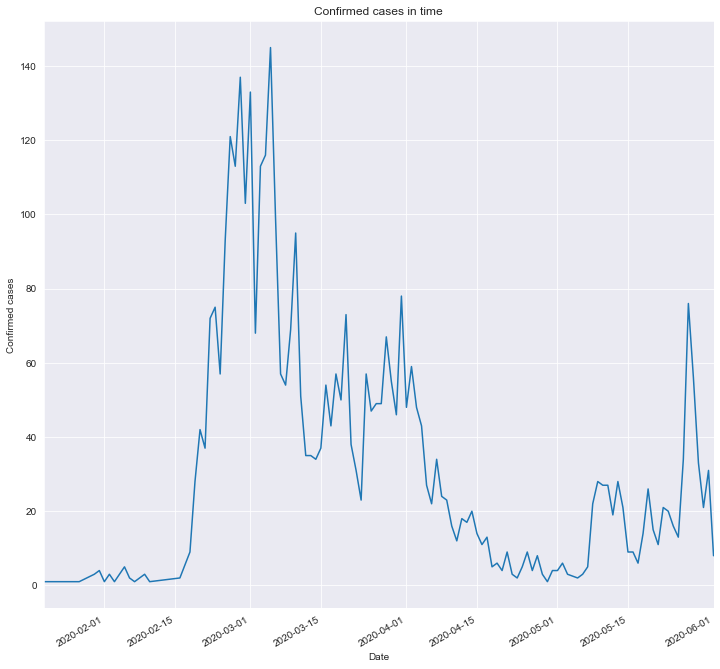

In [687]:
plt.figure(figsize=(12,12))
daily_count = patientinfo_df.groupby('confirmed_date').patient_id.count()
daily_count.plot();
plt.xlabel('Date')
plt.ylabel('Confirmed cases')
plt.title('Confirmed cases in time');

**Althought we thought South Korea has already won the battle with COVID19 the latest data is a little frightening, the visible peak at the beginning of June is not a good sign. Even though the overall data looks promising - the worst period so far was in March.**

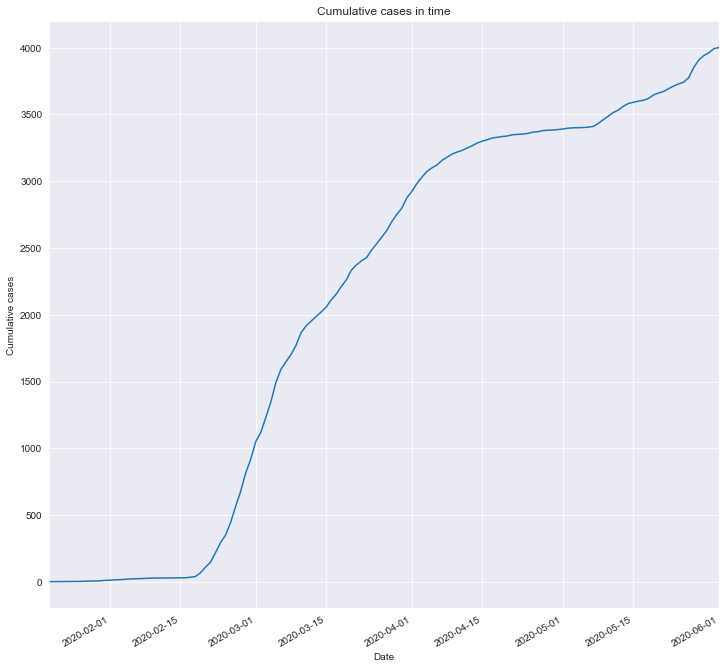

In [689]:
plt.figure(figsize=(12,12))
accumulated_count = daily_count.cumsum()
accumulated_count.sort_values().plot()
plt.xlabel('Date')
plt.ylabel('Cumulative cases')
plt.title('Cumulative cases in time');

**The plot above shows that over time line becomes smoother, what indicates high peak at the beginning of covid19 spread and actions taken to minimize the outbreak.**

In [252]:
infection_case = patientinfo_df['infection_case'].value_counts()
infection_case = infection_case[infection_case>50]

contact with patient        1182
overseas inflow              703
etc                          601
Itaewon Clubs                156
Guro-gu Call Center          112
Shincheonji Church           107
Coupang Logistics Center      70
Name: infection_case, dtype: int64

I have selected the top cases of infection in the provided dataset to remain readability on next charts

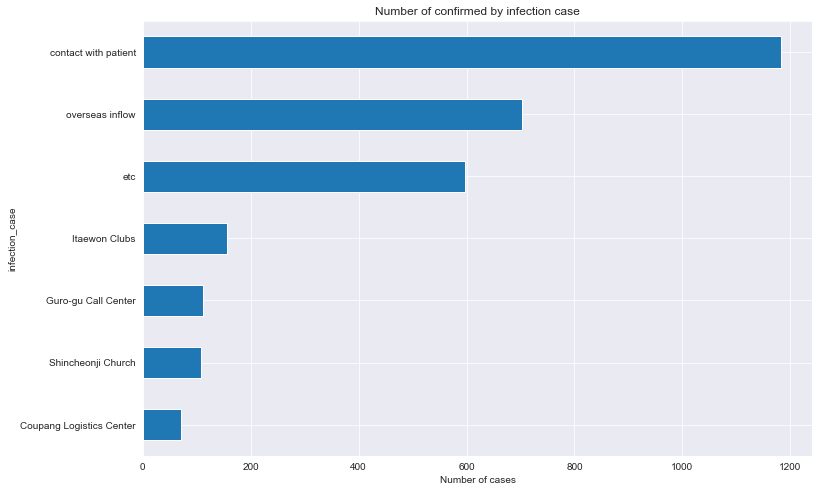

In [692]:
common_cases=patientinfo_df.groupby('infection_case') \
    .filter(lambda x: len(x)>50)['infection_case'].unique()
plt.figure(figsize=(12,8))
plt.xlabel('Number of cases')
plt.ylabel('Infection case')
plt.title('Number of confirmed by infection case')
patientinfo_df[patientinfo_df['infection_case'].isin(common_cases)] \
    .groupby('infection_case') \
    .count()['patient_id'] \
    .sort_values() \
    .plot(kind='barh', color=base_color);


**The most common case of infection is the contact with someone already infected, that's why social distancing was/is so important. 
Overseas inflow also implicates that on airport/in the airplane was someone ill, spreading the virus.**

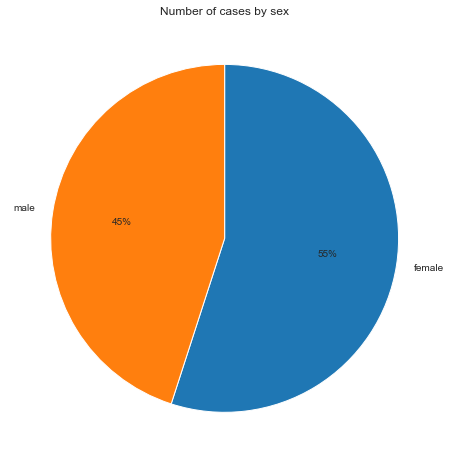

In [693]:
sex = patientinfo_df['sex'].value_counts()
plt.figure(figsize=(12,8))
plt.title('Number of cases by sex')
plt.pie(sex, labels=sex.index, startangle=90, counterclock=False, autopct='%1.0f%%');

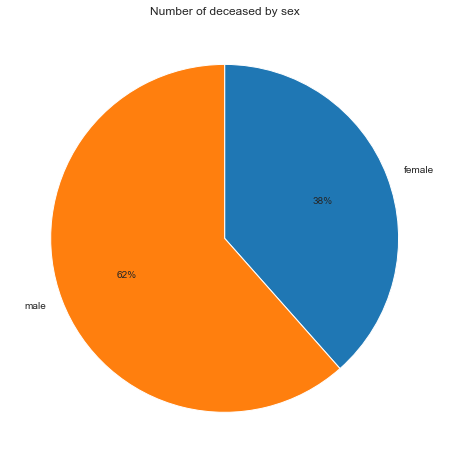

In [694]:
sex_deceased = patientinfo_df[patientinfo_df['deceased_date'].notna()]['sex'].value_counts().sort_values()
plt.figure(figsize=(12,8))
plt.title('Number of deceased by sex')
plt.pie(sex_deceased, labels=sex_deceased.index, startangle=90, counterclock=False, autopct='%1.0f%%');

**Even though women are more often infected men have higher mortality rate when it comes to covid19.**

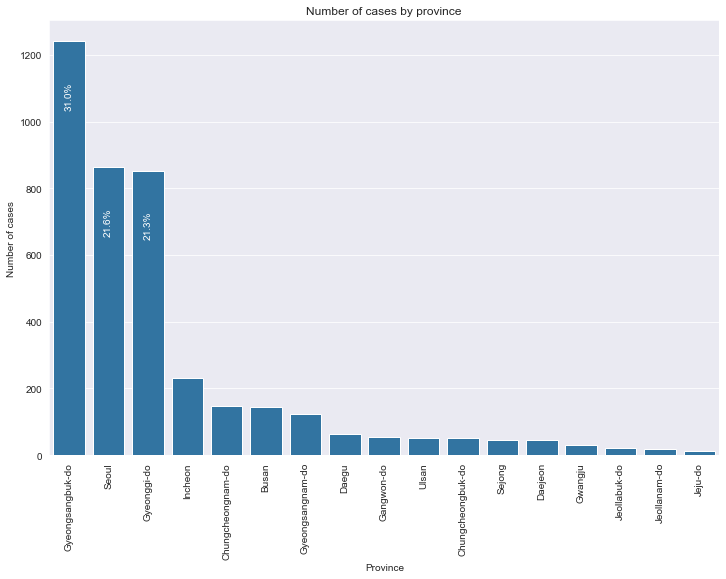

In [696]:
plt.figure(figsize=(12,8))
sb.countplot(data=patientinfo_df, x='province', color=base_color, order=patientinfo_df['province'].value_counts().index)
plt.xticks(rotation=90);
n_points = patientinfo_df.shape[0]
cat_counts = patientinfo_df['province'].value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    if(100*count/n_points > 10):
        plt.text(loc,count-200, pct_string, ha='center',color='w', rotation=90)
plt.xlabel('Province')
plt.ylabel('Number of cases')
plt.title('Number of cases by province');

**The most patients infected were from Gyeongsangbuk-do province, what is unusual, because it's not the most populated province in South Korea.**

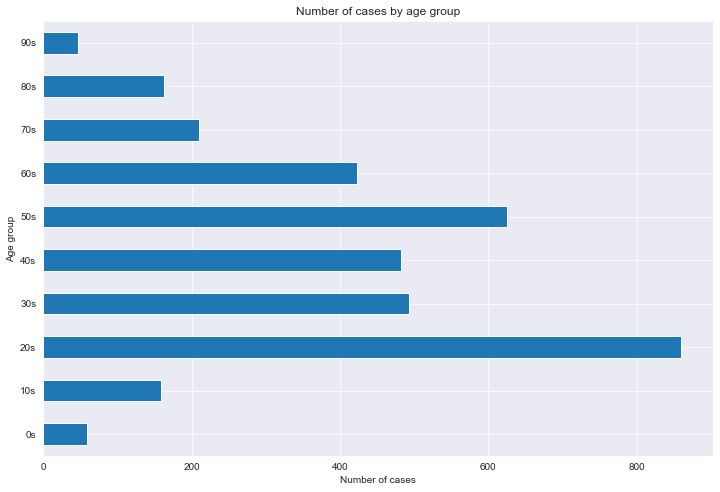

In [697]:
invalid_ages = ['100s', '30']
plt.xlabel('Number of cases')
plt.ylabel('Age group')
plt.title('Number of cases by age group')
patientinfo_df[~patientinfo_df['age'].isin(invalid_ages)]['age'].value_counts().sort_index().plot(kind='barh', figsize=(12,8));

**COVID19 was spreading faster between people in their 20s and 50s.**



Additional fixes to make time series data readable

In [310]:
time_df.set_index('date', inplace=True)
time_df.index = pd.to_datetime(time_df.index)

Additional functions to visualize time series data (it's extremely user-unfriendly, unless there is some special way to create such visuals)

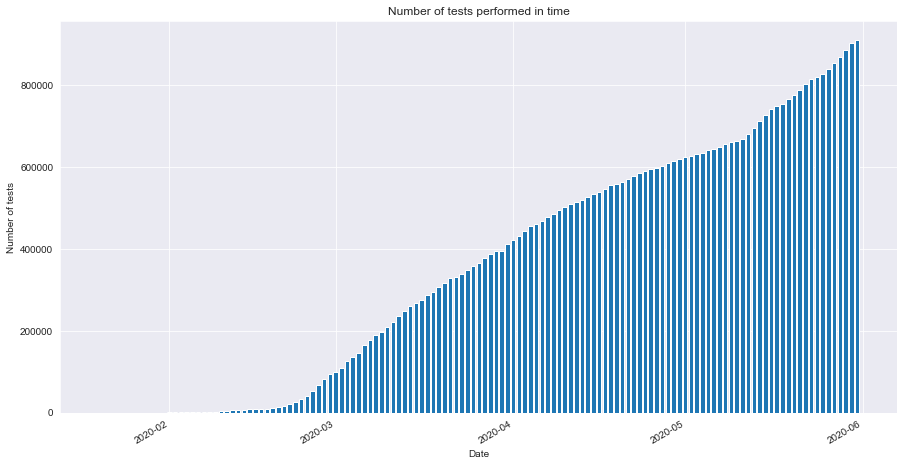

In [698]:
def format_date(ax):
    days = mdates.DayLocator()
    months = mdates.MonthLocator()  # every month
    dayFmt = mdates.DateFormatter('%D')
    monthFmt = mdates.DateFormatter('%Y-%m')
    ax.figure.autofmt_xdate()
    ax.xaxis.set_major_locator(months) 
    ax.xaxis.set_major_formatter(monthFmt)
    ax.xaxis.set_minor_locator(days)
    
def stack_bar(df, ax, legend, **kwargs):
    P = []
    lastBar = None

    for col in df.columns:
        X = df.index
        Y = df[col]
        if lastBar is not None:
            P.append(ax.bar(X, Y, bottom=lastBar, **kwargs))
        else:
            P.append(ax.bar(X, Y, **kwargs))
        lastBar = Y
    if(legend):
        plt.legend([p[0] for p in P], df.columns)
    
fig, ax = plt.subplots(1, figsize=(15,8))
stack_bar(time_df[['test']],ax, False)
format_date(ax)
plt.title('Number of tests performed in time')
plt.xlabel('Date')
plt.ylabel('Number of tests')
plt.show()

**Starting in March South Korea has started testing people for COVID19, quickly exceeding 100k tests per day. Right now South Korea performs more than 800k tests daily.**

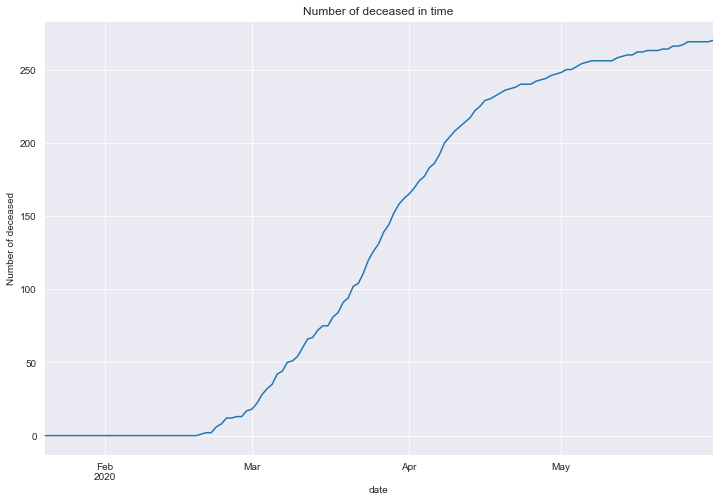

In [699]:
plt.title('Number of deceased in time')
plt.xlabel('Date')
plt.ylabel('Number of deceased')
time_df['deceased'].plot(figsize=(12,8));

**Unfortunately even though most tests come back negative there are still people fighting with Covid19, more than 250 people so far have lost their fight.**

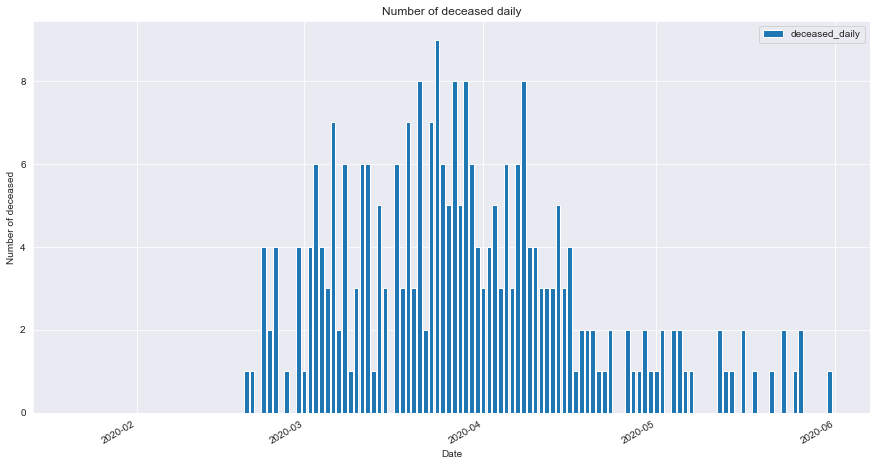

In [700]:
time_df['deceased_daily'] = time_df['deceased'].diff()
fig, ax = plt.subplots(1, figsize=(15,8))
stack_bar(time_df[['deceased_daily']],ax, True)
format_date(ax)
plt.title('Number of deceased daily')
plt.xlabel('Date')
plt.ylabel('Number of deceased')
plt.show()

**Fortunately looks like South Korea has already faced it's worst period.**

In [488]:
searchtrend_df.set_index('date', inplace=True)
searchtrend_df.index = pd.to_datetime(searchtrend_df.index)

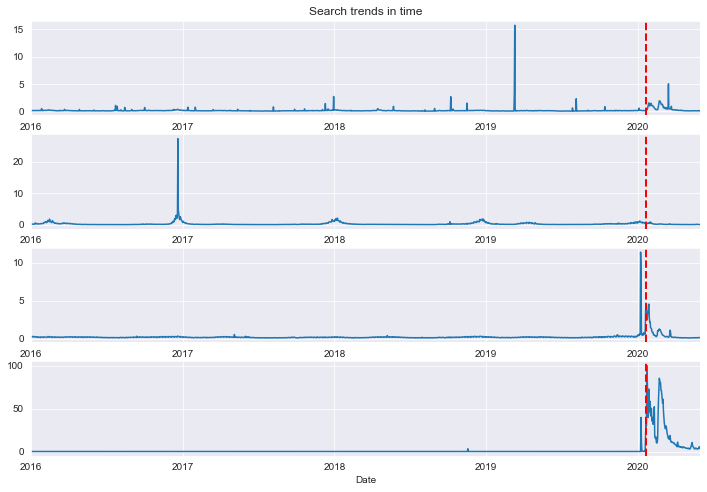

In [703]:
plt.figure(figsize=(12,8))
plt.subplot(4,1,1)
plt.title('Search trends in time')
searchtrend_df['cold'].plot(figsize=(12,8))
plt.axvline(pd.to_datetime('2020-01-20'), color='r', linestyle='--', lw=2)
plt.subplot(4,1,2)
searchtrend_df['flu'].plot(figsize=(12,8))
plt.axvline(pd.to_datetime('2020-01-20'), color='r', linestyle='--', lw=2)
plt.subplot(4,1,3)
searchtrend_df['pneumonia'].plot(figsize=(12,8))
plt.axvline(pd.to_datetime('2020-01-20'), color='r', linestyle='--', lw=2);
plt.subplot(4,1,4)
searchtrend_df['coronavirus'].plot(figsize=(12,8))
plt.xlabel('Date')
plt.axvline(pd.to_datetime('2020-01-20'), color='r', linestyle='--', lw=2);

**Comparing data from Korean's portal we see that obviously coronavirus was extensively searched just after the outbreak, but there is no such spike in cold, flu or pneumonia. It's quite interesting that so many people have searched for pneumonia just before the outbreak.**

In [502]:
weather_df.set_index('date', inplace=True)
weather_df.index = pd.to_datetime(weather_df.index)

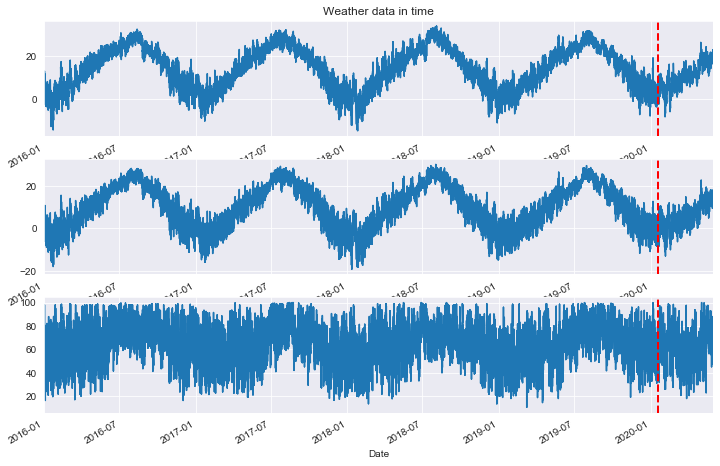

In [704]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.title('Weather data in time')
weather_df['avg_temp'].plot(figsize=(12,8))
plt.axvline(pd.to_datetime('2020-01-20'), color='r', linestyle='--', lw=2)
plt.subplot(3,1,2)
weather_df['min_temp'].plot(figsize=(12,8))
plt.axvline(pd.to_datetime('2020-01-20'), color='r', linestyle='--', lw=2)
plt.subplot(3,1,3)
weather_df['avg_relative_humidity'].plot(figsize=(12,8))
plt.xlabel('Date')
plt.axvline(pd.to_datetime('2020-01-20'), color='r', linestyle='--', lw=2);

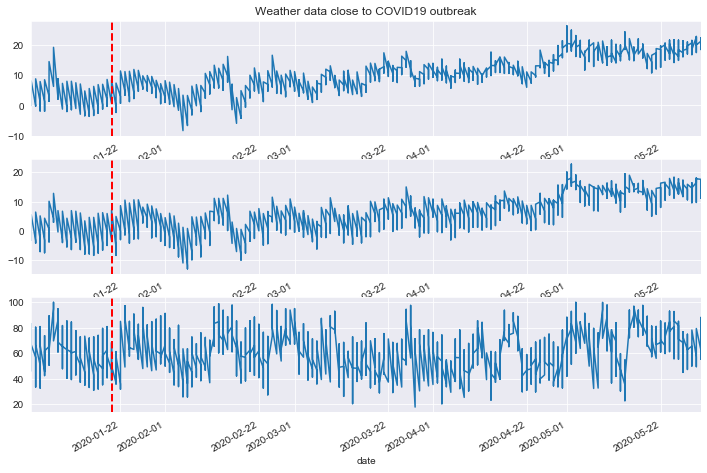

In [705]:
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)
plt.title('Weather data close to COVID19 outbreak')
weather_df[weather_df.index>'2020-01-01']['avg_temp'].plot(figsize=(12,8))
plt.axvline(pd.to_datetime('2020-01-20'), color='r', linestyle='--', lw=2)
plt.subplot(3,1,2)
weather_df[weather_df.index>'2020-01-01']['min_temp'].plot(figsize=(12,8))
plt.axvline(pd.to_datetime('2020-01-20'), color='r', linestyle='--', lw=2)
plt.subplot(3,1,3)
plt.xlabel('Date')
weather_df[weather_df.index>'2020-01-01']['avg_relative_humidity'].plot(figsize=(12,8))
plt.axvline(pd.to_datetime('2020-01-20'), color='r', linestyle='--', lw=2);

**Weather in South Korea is very seasonal and there is no indicator so far that weather might actually worsen the covid19 spread.**

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [396]:
timeage_df.set_index('date', inplace=True)
timeage_df.index = pd.to_datetime(timeage_df.index)

In [541]:
timeage_df['confirmed_daily'] = 0
ages = timeage_df['age'].unique()
for age in ages:
    timeage_df.loc[timeage_df.age==age,'confirmed_daily']=timeage_df[timeage_df['age']==age]['confirmed'].diff()

In [545]:
timeage_df.loc[timeage_df.index=='2020-03-02','confirmed_daily']=timeage_df[timeage_df.index=='2020-03-02']['confirmed']

In [561]:
latest_confirmed = timeage_df[timeage_df.index=='2020-05-31']
latest_confirmed

,time,age,confirmed,deceased,confirmed_daily
date,,,,,
2020-05-31,0,0s,157,0,0.0
2020-05-31,0,10s,655,0,0.0
2020-05-31,0,20s,3176,0,9.0
2020-05-31,0,30s,1292,2,7.0
2020-05-31,0,40s,1521,3,4.0
2020-05-31,0,50s,2039,15,6.0
2020-05-31,0,60s,1405,39,1.0
2020-05-31,0,70s,725,80,0.0
2020-05-31,0,80s,498,131,0.0


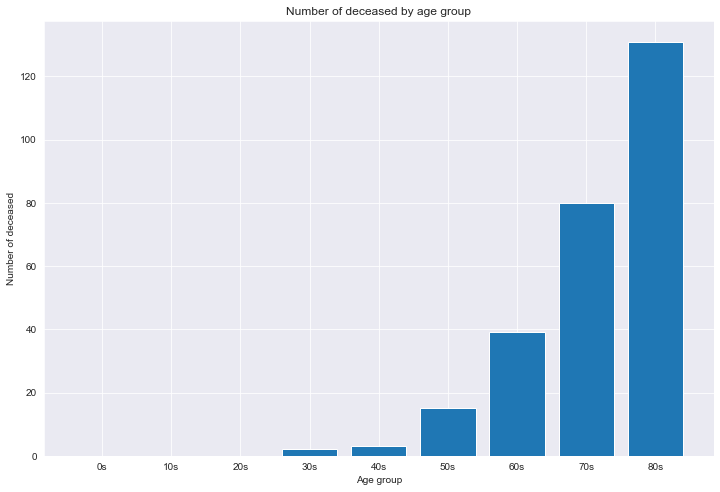

In [706]:
plt.figure(figsize=(12,8))
plt.title('Number of deceased by age group')
plt.xlabel('Age group')
plt.ylabel('Number of deceased')
plt.bar(latest_confirmed['age'], latest_confirmed['deceased']);

**According to the barplot above most victims are above 50.**

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

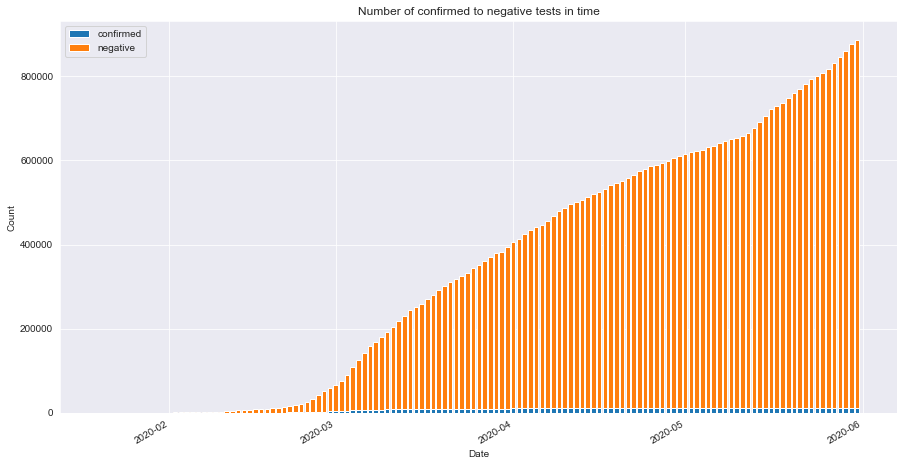

In [707]:
fig, ax = plt.subplots(1, figsize=(15,8))
stack_bar(time_df[['confirmed', 'negative']],ax, True)
format_date(ax)
plt.title('Number of confirmed to negative tests in time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [585]:
time_trend = time_df.join(searchtrend_df, how='inner')

,time,test,negative,confirmed,released,deceased,positive_ratio,deceased_daily,cold,flu,pneumonia,coronavirus
date,,,,,,,,,,,,
2020-01-20,16,1,0,1,0,0,1.000000,NaN,0.19217,0.70343,3.63716,20.69610
2020-01-21,16,1,0,1,0,0,1.000000,0.0,0.22462,0.59789,4.31987,35.33284
2020-01-22,16,4,3,1,0,0,0.250000,0.0,0.23808,0.56661,3.66416,29.74474
2020-01-23,16,22,21,1,0,0,0.045455,0.0,0.30308,0.55625,3.18035,100.00000
2020-01-24,16,27,25,2,0,0,0.074074,0.0,0.34689,0.40226,2.48156,86.11541


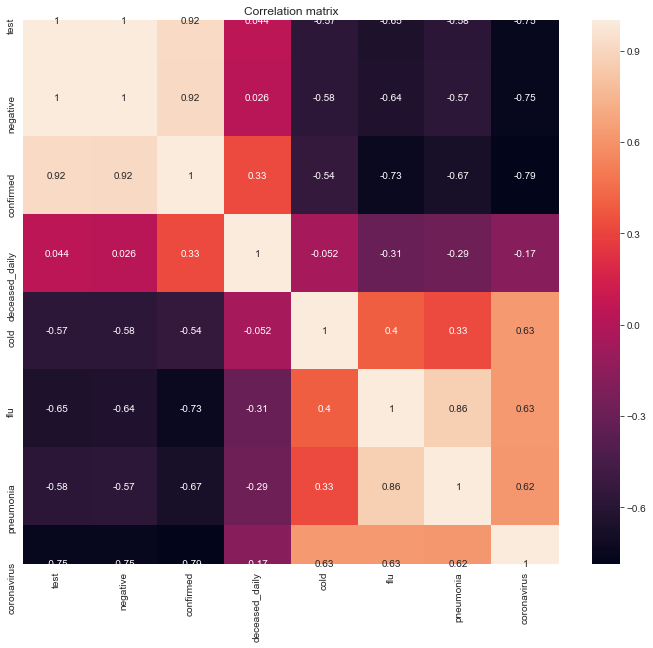

In [713]:
corr = time_trend[['test','negative','confirmed','deceased_daily','cold','flu','pneumonia','coronavirus']].corr()
plt.figure(figsize=(12,10))
plt.title('Correlation matrix')
plt.xticks(rotation=90)
sb.heatmap(corr, annot=True);

**By comparing search trends data with tests outcomes there is some correlation between searched words like 'flu' with confirmed cases, and 'coronavirus' with all tests performed.**

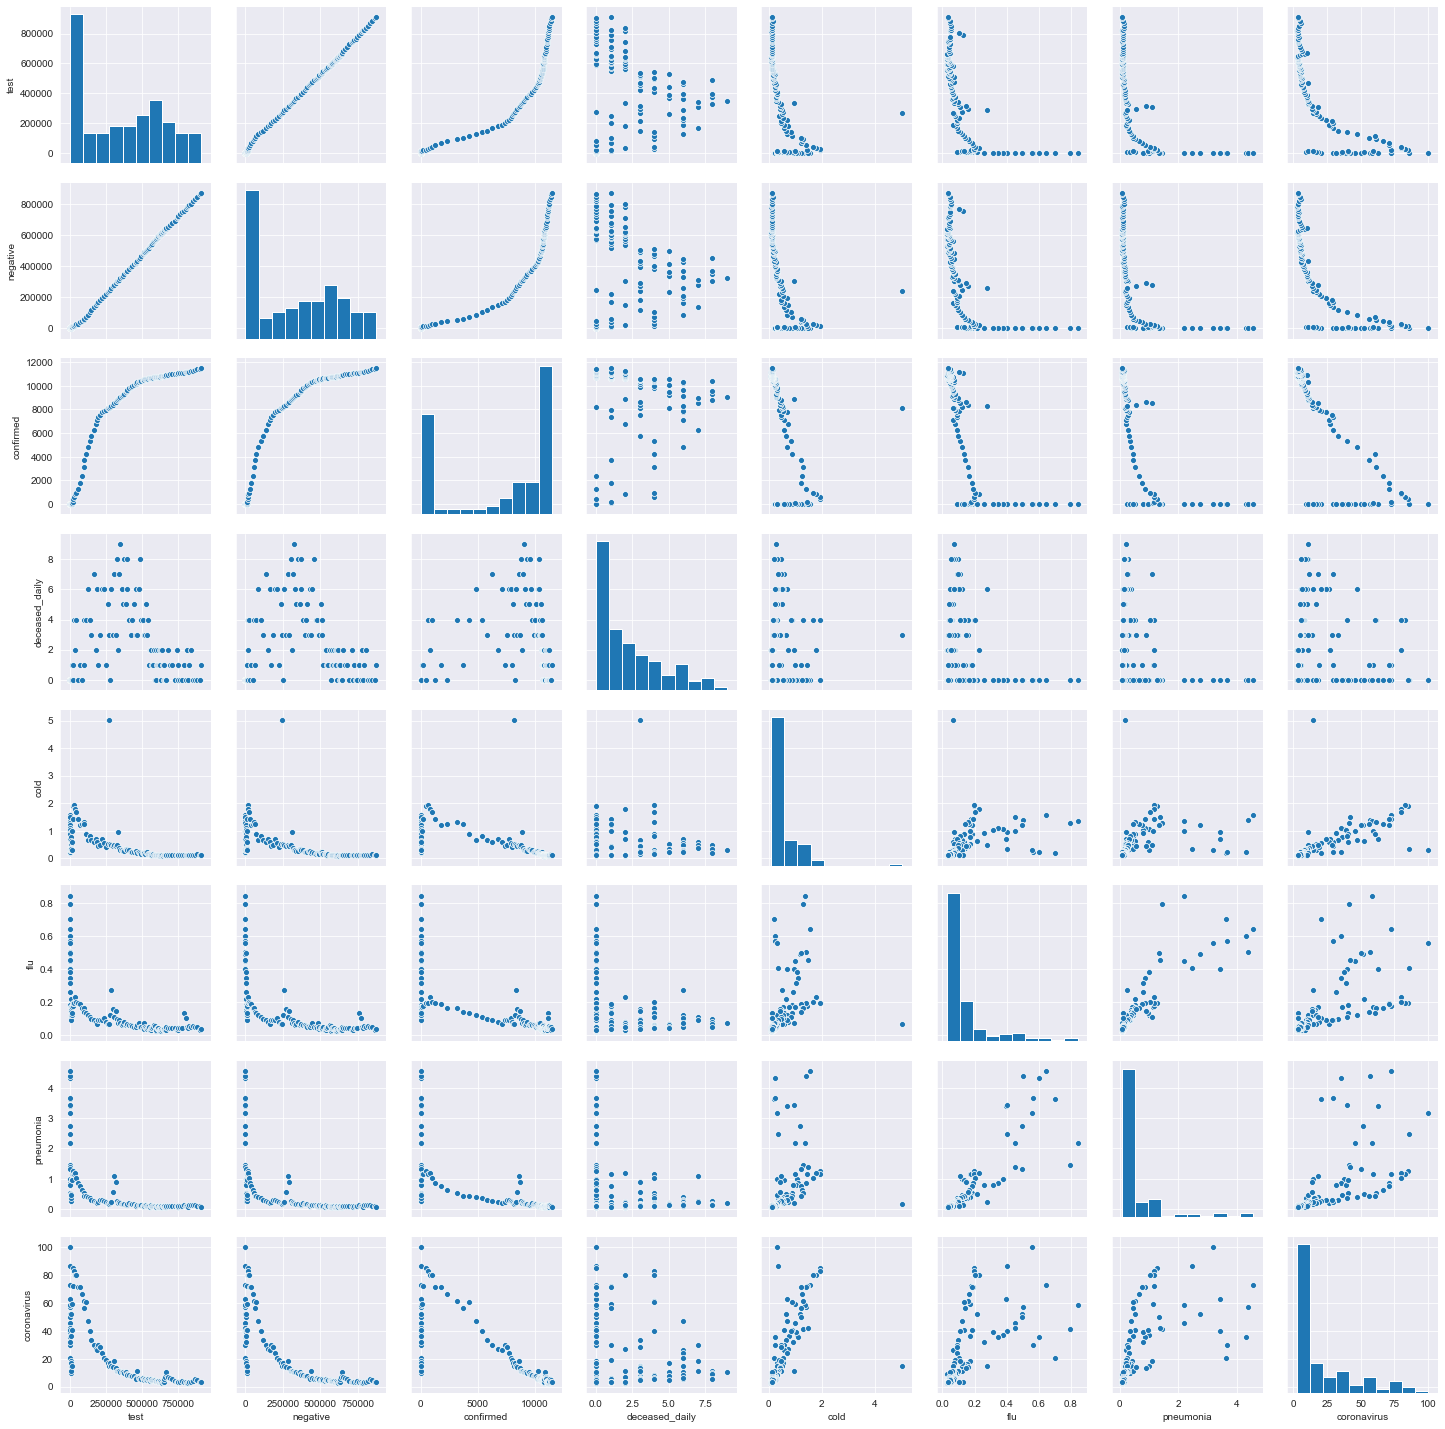

In [717]:
sb.pairplot(time_trend[['test','negative','confirmed','deceased_daily','cold','flu','pneumonia','coronavirus']]);

**Above plot shows correlation between selected variables as well as histograms. No variable has normal distribution. There is visible correlation between searching for 'cold', 'flu', 'pneumonia' and searched 'coronavirus' phrases.**

In [ ]:
region_df.set_index('province', inplace=True)
timeprovince_df.set_index('date', inplace=True)
timeprovince_df.index = pd.to_datetime(timeprovince_df.index)
latest_region = latest_region.reset_index()
latest_region.drop(['date','time'], axis=1, inplace=True)
regions_combined = region_df.groupby('province').agg({'elementary_school_count':['sum'],
                                  'kindergarten_count':['sum'],
                                  'elderly_population_ratio':['mean']})
regions_combined.reset_index(inplace=True)
regions_data = regions_combined.set_index('province').join(latest_region.set_index('province'), how='inner', on='province')
regions_data.reset_index(inplace=True)
regions_data.columns = ['province', 'elementary_schools', 'kindergartens', 'elderly_population_ratio','confirmed','released','deceased']

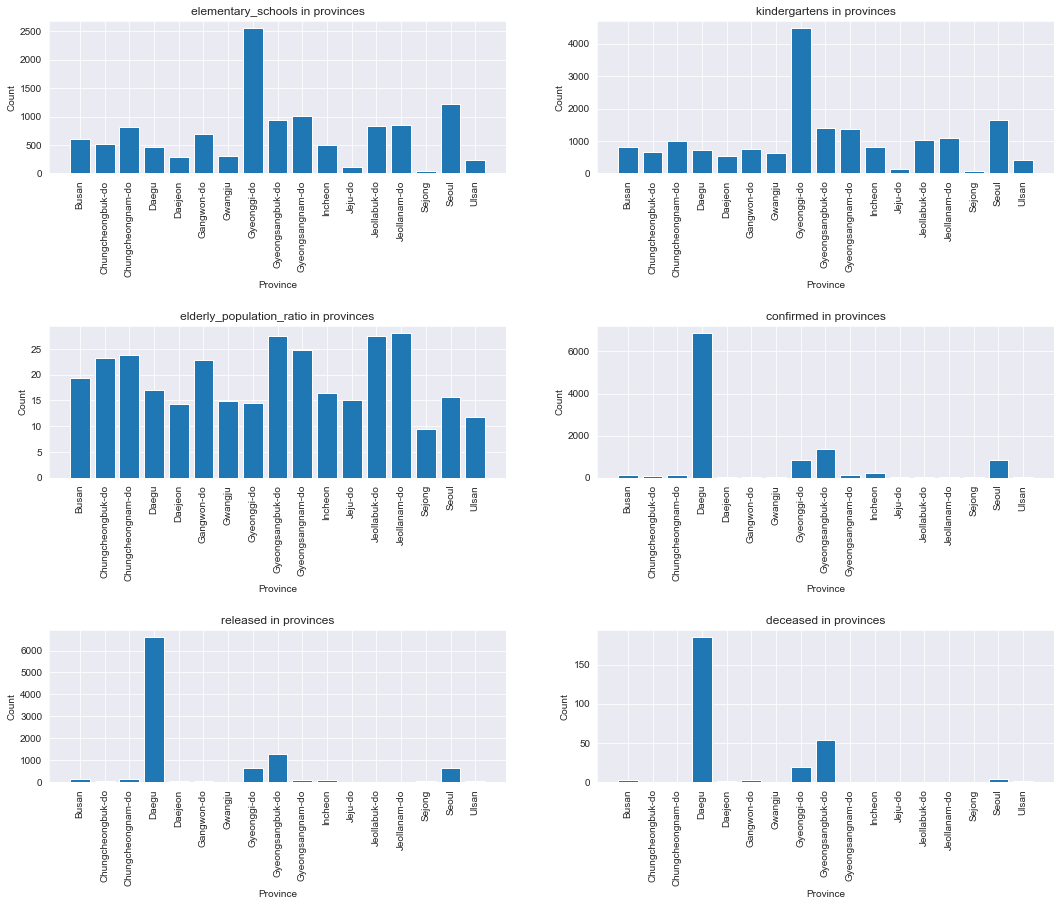

In [719]:
cols = ['elementary_schools', 'kindergartens', 'elderly_population_ratio','confirmed','released','deceased']
plt.figure(figsize=(18,14))
for i,col in enumerate(cols):
    plt.subplot(3,2,i+1)
    plt.subplots_adjust(hspace=1)
    plt.bar(regions_data['province'], regions_data[col])
    plt.title(col + " in provinces")
    plt.xlabel('Province')
    plt.ylabel('Count')
    plt.xticks(rotation=90)

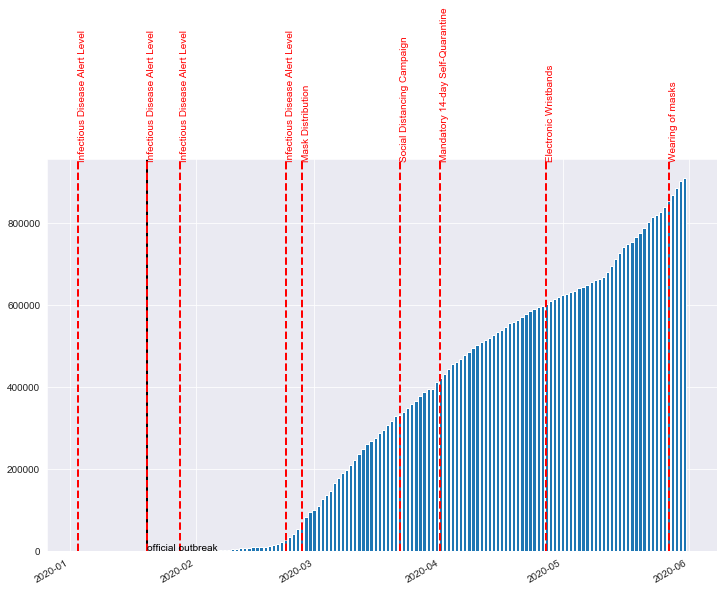

In [743]:
time_df['positive_ratio'] = time_df['confirmed']/time_df['test']
fig, ax = plt.subplots(1, figsize=(12,8))
stack_bar(time_df[['test']],ax, False)
format_date(ax)
plt.axvline(pd.to_datetime('2020-01-20'), color='black', linestyle='-', lw=2)
plt.text(pd.to_datetime('2020-01-20'), ax.get_ylim()[0] ,'official outbreak', color='black')
for index,row in policy_df[policy_df['policy_id'].isin([1,2,3,4,18,27,29,52,57])][['gov_policy','start_date']].iterrows():
    plt.axvline(pd.to_datetime(row['start_date']), color='r', linestyle='--', lw=2)
    plt.text(pd.to_datetime(row['start_date']), ax.get_ylim()[1] ,row['gov_policy'], color='r', rotation=90)
plt.show()

**Above visualization shows the selected alerts on number of tests graph.**

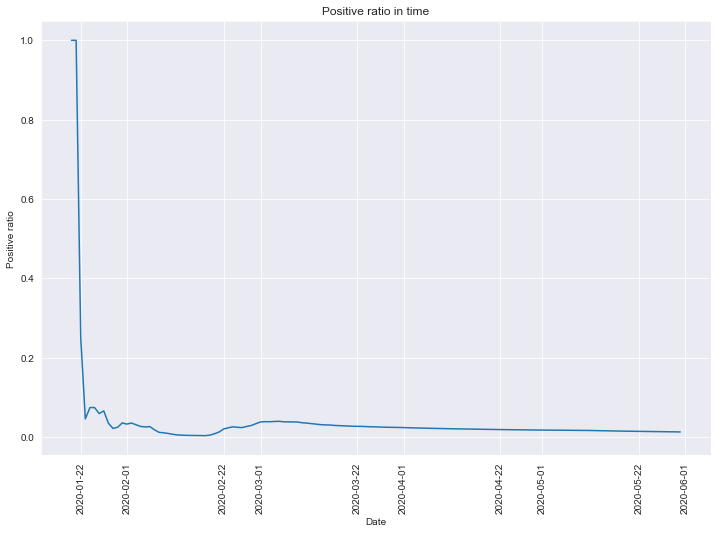

In [746]:
time_df['positive_ratio'] = time_df['confirmed']/time_df['test']
plt.figure(figsize=(12,8))
plt.title('Positive ratio in time')
plt.xlabel('Date')
plt.ylabel('Positive ratio')
plt.xticks(rotation=90)
plt.plot(time_df['positive_ratio']);

**Positive ratio calculated as number of positive tests by all tests performed indicates the overall improvement in the covid19 situation in South Korea.**